got 0 elements on line 7192; break


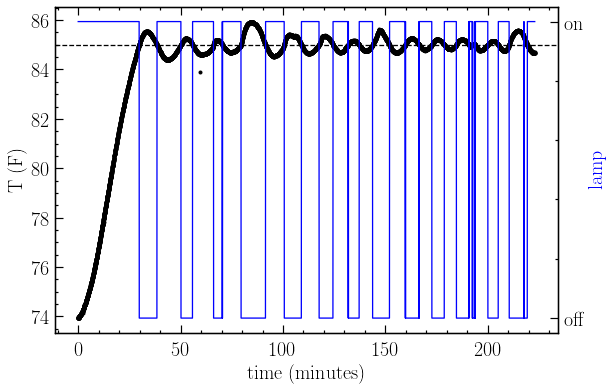

In [28]:
log = {
    'time':np.array([]), 
    'status':np.array([]), 
    't':np.array([])
}
with open('station.log', 'r') as f:
    i = 1
    while True:
        data =  f.readline().split()
        if len(data) == 5:
            date, _time_, t, p, h = data
            status = 'on'
        elif len(data) == 6:
            date, _time_, status, t, p, h = data
        else:
            print('got {} elements on line {}; break'.format(len(data), i))
            break
            
        i += 1
            
        _time_ = _time_.split(':')
        time = float(_time_[2]) + float(_time_[1]) * 60 + float(_time_[0]) * 3600
        
        status = {'on':1, 'off':0}[status]
        log['time'] = np.append(log['time'], time)
        log['t'] = np.append(log['t'], float(t))
        log['status'] = np.append(log['status'], status)
    
log['time'] -= log['time'][0]
log['time'] /= 60.
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(log['time'], log['t'], 'k.')
ax.set_ylabel('T (F)')
axr = ax.twinx()
axr.plot(log['time'], log['status'], 'b-')
axr.set_ylabel('lamp', color='b')
ax.set_xlabel('time (minutes)')
xs = ax.get_xlim()
ax.hlines(85., *xs, linestyle='--')
ax.set_xlim(*xs)
from matplotlib import ticker
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
axr.yaxis.set_ticks([0, 1])
axr.yaxis.set_ticklabels(['off', 'on'])
plt.savefig('test_simple_second_cadence.pdf')